<a href="https://colab.research.google.com/github/Suraj-7077/Unsupervised-ML-Book-Recommendation-system-Model/blob/main/Unsupervised_ML_Capstone_Project_IV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



## **Project Type**    - EDA / Unsupervised ML / Recommendation System 
## **Project Title** - Book Recommendation System
## **Contribution**    - Individual

## **Contributor** - Suraj Shrikant Galande 

# **Project Summary -**

**During** **the** **last** **few** **decades**, **with** **the** **rise** of **Youtube**, **Amazon**, **Netflix**, **and** **many**
**other such web services**, **recommender systems have taken more and more place**
**in our lives**  . **From e-commerce** (**suggest to buyers articles that could interest them)** **to online advertisement (suggest to users the right contents, matching their preferences)**, **recommender systems are today unavoidable in our daily online journeys**.    

**In a very general way**, **recommender systems are algorithms aimed at suggesting**
**relevant items to users** **(items being movies to watch, text to read, products to buy, or anything else depending on industries)**. 

**Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors**. 

**The main objective of this project is to create a book recommendation system for users**.


# **GitHub Link -**

https://github.com/Suraj-7077/Unsupervised-ML-Book-Recommendation-system-Model.git

# **Problem Statement**


**In some industries, the use of recommender systems is crucial because, when we implemented it well, then they can be extremely profitable and set themselves apart from their competitors**. 

**Online book selling websites nowadays are competing with each other. One of the most effective strategies for increasing sales,enhancing customers experience and retaining customers is done by building an efficient Recommendation system.**

**The book recommendation system must recommend books that makes interests to buyers.** 

**Popularity based approach and Collaborative Filtering (CF) approach are used in this project to build book recommendation systems Model.**



# **Dataset Description**

Dataset used in this project is from Amazon Web services.

It Contains Three Datasets - 

1) Users Dataset :-  

Contains Features as           
                   
                    i) User-ID: A unique identification number for each user

                    ii) Location:It contains city,state and country to which the user belongs ,separated by commas

                    iii) Age:The age of the users 

2) Books Dataset :-  
Contains features as 

         i) SBN:International Standard Book Number unique to each edition of the book
        ii) Book-Title:Title of the book
        iii) Book-Author:Author of the book(incase of several authors only the first is provided)
        iv) Year-of-Publication:The year in which the particular edition of the book was published
        v) Publisher:Name of the Book Publishing company
        vi) Image-URL-S: URL link to a small version of the book cover displayed on the Amazon website
        vii) Image-URL-M: URL link to Medium version image of the book cover displayed on the Amazon website
       viii) Image-URL-L: URL link to Large sized image of the book cover displayed on the Amazon website 

3) Ratings Dataset :-  
Contains Features as 

           i)  User-ID:as mentioned above
           ii) ISBN:as mentioned above
           iii) Book-Rating: The rating given by the user (identified by User-ID) for the book (identified by ISBN). 
           It is either explicit,expressed on a scale from 1-10 (higher values denoting higher appreciation), 
           or implicit,expressed by 0 ( i.e. Lower appreciation).



# Importing libraries

In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Loading Datasets

In [2]:
user_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Users.csv')

In [3]:
book_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Books.csv')

In [4]:
ratings_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Ratings.csv')

In [5]:
user_df.head(4)              # Looking first 4 observations of user dataset

User-ID                         Location   Age
0        1               nyc, new york, usa   NaN
1        2        stockton, california, usa  18.0
2        3  moscow, yukon territory, russia   NaN
3        4        porto, v.n.gaia, portugal  17.0

In [6]:
book_df.head(4)              # looking first 4 observations of books dataset

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   

            Book-Author Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                2002  Oxford University Press   
1  Richard Bruce Wright                2001    HarperFlamingo Canada   
2          Carlo D'Este                1991          HarperPerennial   
3      Gina Bari Kolata                1999     Farrar Straus Giroux   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...

In [7]:
ratings_df.head(4)          # looking first 4 rows of ratings datset

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3

In [8]:
print(f' shape of users dataset = {user_df.shape},\n\n shape of books dataset = {book_df.shape},\n\n shape of ratings dataset = {ratings_df.shape}')

 shape of users dataset = (278858, 3),

 shape of books dataset = (271360, 8),

 shape of ratings dataset = (1149780, 3)


# 1) Users Data 

#  Preprocessing The Users data

In [9]:
user_df.head(10)                  # first 10 observations of users dataset

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
5        6       santa monica, california, usa  61.0
6        7                 washington, dc, usa   NaN
7        8            timmins, ontario, canada   NaN
8        9          germantown, tennessee, usa   NaN
9       10          albacete, wisconsin, spain  26.0

In [10]:
user_df.tail(10)                      # last 10 observations of users datset

User-ID                            Location   Age
278848   278849         georgetown, ontario, canada  23.0
278849   278850          sergnano, lombardia, italy   NaN
278850   278851                  dallas, texas, usa  33.0
278851   278852     brisbane, queensland, australia  32.0
278852   278853      stranraer, n/a, united kingdom  17.0
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

In [11]:
user_df.shape

(278858, 3)

In [12]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


There are 278858 number of observations(Rows) and 3 features (columns) in user 
datframe 

numerical features = 'User-ID' and 'Age' 

categorical feature = 'Location'

##  **Statistical summary of users dataset**

In [13]:
user_df.describe(include='all')

User-ID                         Location            Age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                              NaN       0.000000
25%      69715.25000                              NaN      24.000000
50%     139429.50000                              NaN      32.000000
75%     209143.75000                              NaN      44.000000
max     278858.00000                              NaN     244.000000

This displays summary of statistics of dataframe

Information of different descriptive statistics :-

1) Measures of Frequency :- Count, Percent, Frequency.

2) Measures of Central Tendency :- Mean, Median, and Mode.

3)Measures of Dispersion or Variation or spread :- Range( max - min ),Variance, Standard Deviation.

4) Measures of Position :- Percentile Ranks, Quartile Ranks.

## Checking null values in users dataset 

In [14]:
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

As we see that Age column has 110762 null values presents.

In [15]:
print(user_df.isnull().sum()/ len(user_df)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


So as almost 40% of age data is missing. but age feature is important regarding exploring dataset, otherwise we have droped this feature.

In [16]:
user_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

As we see that maximum age of user is 244 which is definitely an outlier.

## Checking distribution of age column 

<Axes: xlabel='Age', ylabel='Count'>

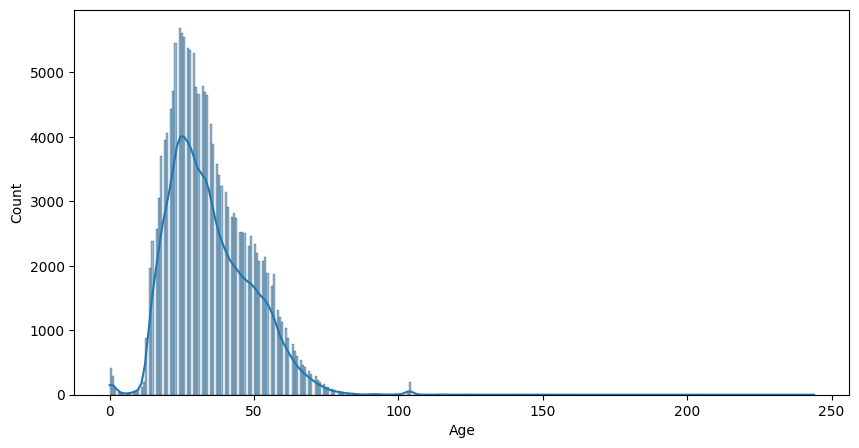

In [21]:
fig = plt.figure(figsize = (10,5))
sns.histplot(user_df['Age'], kde=True)

As we see that distribution of Age feature in users data is slightly positively skewed. 

We can say that it is unlikely to have users of age above 95 years and below age of 5. 

## Lets plot boxplot for age to check outliers

<Axes: xlabel='Age'>

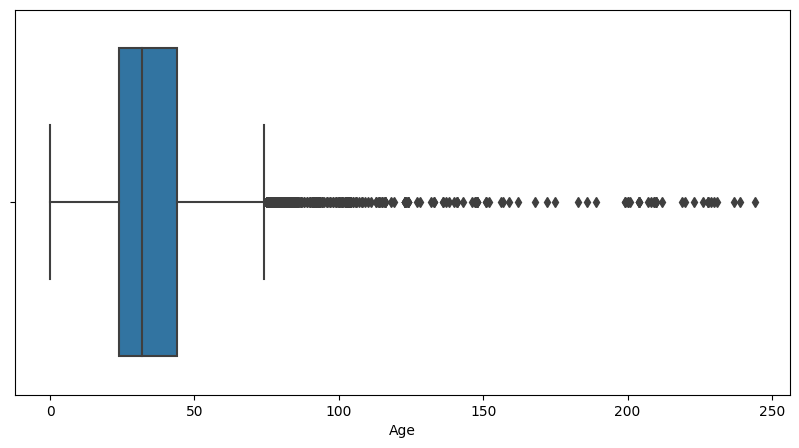

In [23]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x= 'Age', data= user_df)

As we say that most of the users are from age group of 25-50 years old.

And we see that above age of 100 there are some outliers present.

## Removing outliers from age columns and filling it with null values.

Becoz above 100 years of age and below 5 years of age, dont think so there are users who reads books so we dont need of these observations.

In [25]:
# Replacing outliers with Nan values

user_df.loc[(user_df['Age'] > 100) | (user_df['Age'] < 5), 'Age'] = np.nan

Now see final total number of missing values in age column after removing outliers. 

In [26]:
print('number of missing values after imputing outliers with nan ', user_df['Age'].isnull().sum())

number of missing values after imputing outliers with nan  112010


In [28]:
user_df['Age'].describe()

count    166848.000000
mean         34.746638
std          13.633051
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

Now its looking good as maximum age of user is 100 year old and minimum age of user is 5 years old.

## Treating null values 

Since Age column is numerical datatype feature so we will fill missing values by there mean.

In [29]:
print('Missing values in Age feature before imputation',user_df['Age'].isnull().sum())

user_df.fillna(user_df['Age'].mean(), inplace=True)

print('Missing Values in Age column after imputation ', user_df['Age'].isnull().sum())

Missing values in Age feature before imputation 112010
Missing Values in Age column after imputation  0


In [31]:
user_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

So in user data we dont have any missing values present

## Now perfoming feature engineering on user data

Since creating Age group column of users based on there Ages 

And extracting country name from location column to make better understanding of userdata.

In [32]:
# Defining function 

def Age_group(age) :
  '''
  defines age group of users based on there year
  '''

  if age < 13 :
    x = 'childs'
  elif age >=13 and age < 20:
    x= 'teens'
  elif age >=20 and age <35 :
    x = 'youth'
  elif age >=35 and age < 55:
    x = 'adults'
  else :
    x= 'olds'
  
  return x

In [33]:
# applying function 
# Creating Age_group column
user_df['Age_group'] = user_df['Age'].apply(lambda x : Age_group(x))

In [35]:
user_df.head()

User-ID                            Location        Age Age_group
0        1                  nyc, new york, usa  34.746638     youth
1        2           stockton, california, usa  18.000000     teens
2        3     moscow, yukon territory, russia  34.746638     youth
3        4           porto, v.n.gaia, portugal  17.000000     teens
4        5  farnborough, hants, united kingdom  34.746638     youth

Thus we have successfully created age group column for better understanding of users.

Now extracting country name from location column

In [39]:
user_df['Location'].nunique()

57339

57339 Number of unique values of locations present in our user data

In [40]:
for i in user_df : 
  user_df['Country'] = user_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [41]:
user_df.head()

User-ID                            Location        Age Age_group  \
0        1                  nyc, new york, usa  34.746638     youth   
1        2           stockton, california, usa  18.000000     teens   
2        3     moscow, yukon territory, russia  34.746638     youth   
3        4           porto, v.n.gaia, portugal  17.000000     teens   
4        5  farnborough, hants, united kingdom  34.746638     youth   

          Country  
0             usa  
1             usa  
2          russia  
3        portugal  
4  united kingdom

In [ ]:
# Since droping location column becoz we dont need it now 

